<a href="https://colab.research.google.com/github/JakeOh/202007_iw_pyda_wkd/blob/master/py16_bitly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
file_path = '/content/drive/My Drive/Colab Notebooks/202007/bitly_usagov/example.txt'
f = open(file_path)  # 파일 열기
print(f.readline())  # 파일에서 첫번째 읽음
f.close()  # 파일 닫기

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



In [4]:
i = 0
f = open(file_path)
for line in f:  # readline()이 자동으로 호출
    print(line)
    i += 1
    if (i == 3):
        break
f.close()

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }

{ "a": "GoogleMaps\/RochesterNY", "c": "US", "nk": 0, "tz": "America\/Denver", "gr": "UT", "g": "mwszkS", "h": "mwszkS", "l": "bitly", "hh": "j.mp", "r": "http:\/\/www.AwareMap.com\/", "u": "http:\/\/www.monroecounty.gov\/etc\/911\/rss.php", "t": 1331923249, "hc": 1308262393, "cy": "Provo", "ll": [ 40.218102, -111.613297 ] }

{ "a": "Mozilla\/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident\/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E; Inf

In [6]:
# JSON(JavaScript Object Notation): 자바스크립트의 객체 표현법
# {key1: value1, key2: value2, ...} 같은 형식의 문자열
# 파이썬의 dict 클래스 타입과 비슷.
# JSON 형식의 문자열 <===> dict 타입 변환: json 패키지
# json.loads(문자열): JSON 문자열을 파이썬의 dict 타입의 객체로 변환
# json.dumps(dict 객체): dict 타입 객체를 JSON 문자열로 변환
import json

records = []  # 파일의 내용을 한줄한줄 저장할 리스트
f = open(file_path)  # 파일 열기.
for line in f:  # 파일에서 한줄씩 읽어서
    # 문자열을 dict로 변환하고 리스트에 추가.
    records.append(json.loads(line))  

f.close()

In [7]:
len(records)

3560

In [11]:
records[0]  # dict 객체들을 저장하고 있는 리스트

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [12]:
# dict들의 리스트 -> 데이터프레임
df = pd.DataFrame(records)
df.iloc[:5]

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [17]:
df.iloc[:10]['tz']

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [18]:
# tz 컬럼의 빈도수
df['tz'].value_counts()

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
                       ... 
America/Tegucigalpa       1
America/Mazatlan          1
Asia/Riyadh               1
Europe/Uzhgorod           1
Europe/Skopje             1
Name: tz, Length: 97, dtype: int64

In [21]:
# tz 컬럼에서 Missing value(결측치)들을 'Missing' 문자열로 대체
clean_tz = df['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_count = clean_tz.value_counts()[:10]
tz_count

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

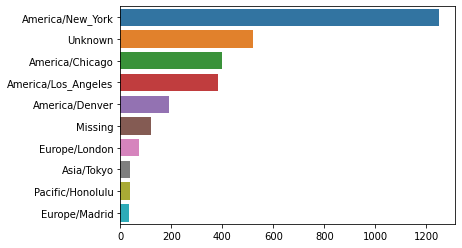

In [23]:
sns.barplot(x=tz_count.values, y=tz_count.index)
plt.show()